#  CONTENTS LIST
## 1. Importing libraries and data frames
## 2. Security implications
## 3. Regional segmentation
## 4. Exclusion flag
## 5. Profiling
## 6. Create visualization
## 7. Aggregation
## 8. Compare Profiles with Regions and States 
## 9. Export Graphs

## 1. Import data set

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create path
path = r'C:\Users\Christian\Desktop\Mein Ordner\CF\Data Immersion\Achievement4\Instacart Basket Analysis'

In [3]:
#Import orders_products_customerl.pkl as df
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer.pkl'))

## 2. Security implications

In [4]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


The columns first_name and surname contain personally identifiable information (PII). The cloumn _merge is unnecessary.
Therefore they can be dropped.

In [5]:
#drop columns
df = df.drop(columns = ['first_name', 'surname', '_merge'])

In [6]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spender_performance,frequency_order,frequency_flag,Gender,State,Age,date_joined,dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3. Regional segmentation 

In [7]:
#Creating empty list
regions = []

In [8]:
#create regional lists 

In [9]:
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [10]:
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [11]:
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
West = ['Idaho','Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
#assign region to state
for state in df['State']:
    if state in Northeast:
        regions.append('Northeast')
    elif state in Midwest:
        regions.append('Midwest')
    elif state in South:
        regions.append('South')
    elif state in West:
        regions.append('West')
    else: 
        print('error')

In [14]:
#add regions to dataframe
df['Region'] = regions

In [15]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_order,frequency_flag,Gender,State,Age,date_joined,dependants,family_status,income,Region
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [16]:
#Determine whether there’s a difference in spending habits between the different U.S. regions.
crosstab = pd.crosstab(df['Region'], df['spender_performance'], dropna = False)

In [17]:
crosstab.sort_values(by='Low spender', ascending=False)

spender_performance,High spender,Low spender
Region,,
South,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


In [18]:
crosstab.sort_values(by='High spender', ascending=False)

spender_performance,High spender,Low spender
Region,,
South,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


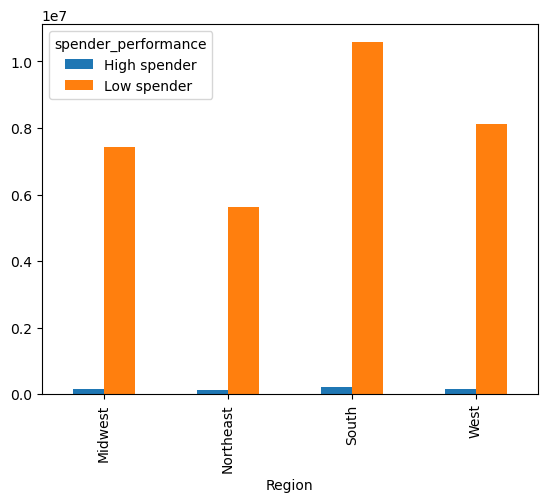

In [19]:
# create bar chart
bar = crosstab.plot.bar()

There are high spenders in every region but low spenders are the majority in all 4 regions. Most of the low spenders are in the 
South region followed by West, Midwest and Northeast. The same sequence of states applies to the high spenders.

In [20]:
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_spender.png'))

## 4. Exclusion flag

In [24]:
#Creating empty list
flag = []

In [25]:
#assign activity
for number in df['order_number']:
    if number < 5:
        flag.append('low-activity customer')
    else:
        flag.append('high-activity customer')

In [26]:
#add activity flags
df['activity_flag'] = flag

In [27]:
df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    24414877
low-activity customer      7989982
Name: count, dtype: int64

In [28]:
# drop all low-activity customers
df_drop = df.drop(df[df['activity_flag'] == 'low-activity customer'].index)

In [29]:
df_drop.shape

(24414877, 33)

In [ ]:
#Export the sample
df_drop.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer_exclusion_flag.pkl'))

## 5. Profiling

In [30]:
df_drop[['Age', 'income', 'dependants']].describe()

,Age,income,dependants
count,2.441488e+07,2.441488e+07,2.441488e+07
mean,4.945734e+01,9.989505e+04,1.502001e+00
std,1.848532e+01,4.333357e+04,1.119171e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.752400e+04,0.000000e+00
50%,4.900000e+01,9.683600e+04,2.000000e+00
75%,6.500000e+01,1.281600e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [31]:
#create age profiles

In [32]:
df_drop.loc[df_drop['Age'] <= 33, 'age-group'] = 'young adult'

In [33]:
df_drop.loc[(df_drop['Age'] > 33) & (df_drop['Age'] < 65), 'age-group'] = 'middle-aged adult'

In [34]:
df_drop.loc[df_drop['Age'] >= 65, 'age-group'] = 'old adult'

In [35]:
df_drop['age-group'].value_counts(dropna = False)

age-group
middle-aged adult    11841096
old adult             6458450
young adult           6115331
Name: count, dtype: int64

In [36]:
#create income profiles

In [37]:
df_drop.loc[df_drop['income'] <= 67524, 'income-group'] = 'low income'

In [38]:
df_drop.loc[(df_drop['income'] > 67524) & (df_drop['Age'] < 128160), 'income-group'] = 'middle income'

In [39]:
df_drop.loc[df_drop['income'] >  128160 , 'income-group'] = 'high income'

In [40]:
df_drop['income-group'].value_counts(dropna = False)

income-group
middle income    12207608
low income        6103734
high income       6103535
Name: count, dtype: int64

In [41]:
# family status

In [42]:
df_drop['dependants'].value_counts(dropna = False)

dependants
3    6133537
0    6105002
2    6094231
1    6082107
Name: count, dtype: int64

In [43]:
df_drop['family_status'].value_counts(dropna = False)

family_status
married                             17138476
single                               4015790
divorced/widowed                     2089212
living with parents and siblings     1171399
Name: count, dtype: int64

In [44]:
df_drop.loc[(df_drop['family_status'] == 'married') & (df_drop['dependants'] == 0), 'fam_status'] = 'married without dependants'

In [45]:
df_drop.loc[(df_drop['family_status'] == 'married') & (df_drop['dependants'] >= 1), 'fam_status'] = 'married with dependants'

In [46]:
df_drop.loc[(df_drop['family_status'] == 'single') & (df_drop['dependants'] == 0), 'fam_status'] = 'single without dependants'

In [47]:
df_drop.loc[(df_drop['family_status'] == 'single') & (df_drop['dependants'] >= 1), 'fam_status'] = 'single with dependants'

In [48]:
df_drop.loc[(df_drop['family_status'] == 'divorced/widowed') & (df_drop['dependants'] == 0), 'fam_status'] = 'divorced/widowed without dependants'

In [49]:
df_drop.loc[(df_drop['family_status'] == 'divorced/widowed') & (df_drop['dependants'] >= 1), 'fam_status'] = 'divorced/widowed with dependants'

In [50]:
df_drop.loc[(df_drop['family_status'] == 'living with parents and siblings') & (df_drop['dependants'] == 0), 'fam_status'] = 'living with parents and siblings without dependants'

In [51]:
df_drop.loc[(df_drop['family_status'] == 'living with parents and siblings') & (df_drop['dependants'] >= 1), 'fam_status'] = 'living with parents and siblings with dependants'

In [52]:
df_drop['fam_status'].value_counts(dropna = False)

fam_status
married with dependants                             17138476
single without dependants                            4015790
divorced/widowed without dependants                  2089212
living with parents and siblings with dependants     1171399
Name: count, dtype: int64

In [53]:
#price range profile

In [54]:
df_drop['price_range_loc'].value_counts()

price_range_loc
nan                   15896174
Low-range product      7626745
Mid-range product       583271
High-range product      308687
Name: count, dtype: int64

In [55]:
#Export the sample
df_drop.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer_profiles.pkl'))

## 6. Create visualization

In [ ]:
#create bar chart 
bar_age =  df_drop['age-group'].value_counts().plot.bar()

In [ ]:
#create bar chart 
bar_income =  df_drop['income-group'].value_counts().plot.bar()

In [ ]:
#create bar chart 
bar_status =  df_drop['fam_status'].value_counts().plot.bar()

In [ ]:
#create bar chart 
bar_price_range = df['price_range_loc'].value_counts().drop(index='nan').plot.bar()

In [ ]:
# export visualisations

In [ ]:
bar_age.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_age.png'))

In [ ]:
bar_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_income.png'))

In [ ]:
bar_status.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_status.png'))

In [ ]:
bar_price_range.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_price_range.png'))

## 7. Aggregation

In [ ]:
# change data type for better memory usage

In [ ]:
df_drop['department_id']=df_drop['department_id'].astype('str')

In [ ]:
df_drop['product_id']=df_drop['product_id'].astype('str')

In [ ]:
df_drop.groupby(['user_id', 'product_id', 'product_name', 'department_id', 'fam_status', 'age-group', 'income-group']).agg({'order_dow':['mean', 'median', 'min', 'max'], 'order_hour_of_day':['mean', 'median', 'min', 'max'], 'days_since_prior_order':['mean', 'median', 'min', 'max']})

## 8. Compare Profiles with Regions and States

In [ ]:
crosstab_state_age = pd.crosstab(df_drop['State'], df_drop['age-group'], dropna = False)

In [ ]:
# create bar chart
bar_state_age = crosstab_state_age.plot.bar()

In [ ]:
crosstab_state_income = pd.crosstab(df_drop['State'], df_drop['income-group'], dropna = False)

In [ ]:
# create bar chart
bar_state_income = crosstab_state_income.plot.bar()

In [ ]:
crosstab_state_status = pd.crosstab(df_drop['State'], df_drop['fam_status'], dropna = False)

In [ ]:
# create bar chart
bar_state_status = crosstab_state_status.plot.bar()

In [ ]:
crosstab_region_age = pd.crosstab(df_drop['Region'], df_drop['age-group'], dropna = False)

In [ ]:
# create bar chart
bar_region_age = crosstab_region_age.plot.bar()

In [ ]:
crosstab_region_income = pd.crosstab(df_drop['Region'], df_drop['income-group'], dropna = False)

In [ ]:
bar_region_income = crosstab_region_income.plot.bar()

In [ ]:
crosstab_region_status = pd.crosstab(df_drop['Region'], df_drop['fam_status'], dropna = False)

In [ ]:
bar_region_status = crosstab_region_status.plot.bar()

## 9. Export Graphs

In [ ]:
# export graphs

In [ ]:
bar_state_age.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_state_age.png'))

In [ ]:
bar_state_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_state_income.png'))

In [ ]:
bar_state_status.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_state_status.png'))

In [ ]:
bar_region_age.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_age.png'))

In [ ]:
bar_region_income.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_income.png'))

In [ ]:
bar_region_status.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_status.png'))